In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
import warnings
warnings.filterwarnings('ignore')

2024-07-23 05:52:38.342450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 05:52:38.342581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 05:52:38.482106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### data loading

In [2]:
datagen = ImageDataGenerator(rescale=(1.0/255.),validation_split=0.25)

In [3]:
path = '/kaggle/input/biggest-genderface-recognition-dataset/faces'
train_data = datagen.flow_from_directory(
    path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training')

Found 20376 images belonging to 2 classes.


In [4]:
validation_data = datagen.flow_from_directory(
    path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation')

Found 6791 images belonging to 2 classes.


In [5]:
train_data.class_indices

{'man': 0, 'woman': 1}

### visualization

### images for man

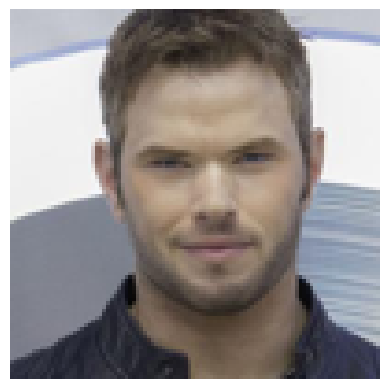

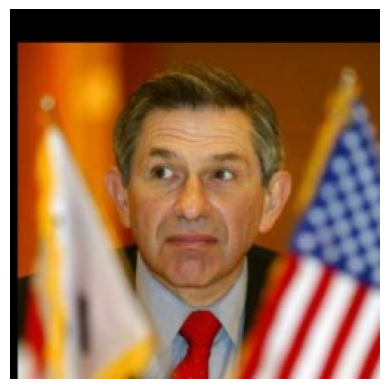

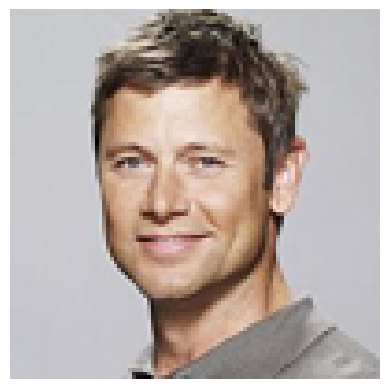

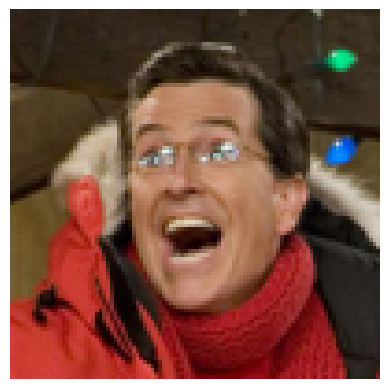

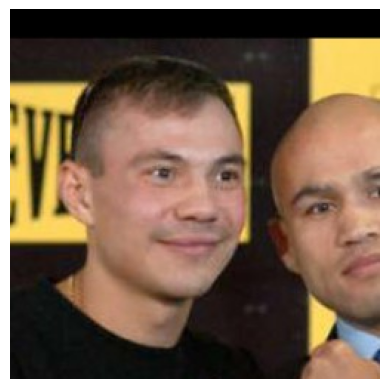

In [6]:
def get_image_paths(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(image_extensions)]
    return image_paths

man_folder_path = '/kaggle/input/biggest-genderface-recognition-dataset/faces/man'
man_paths_ = get_image_paths(man_folder_path)

# Display each image
for path_ in man_paths_[3:8]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### images for woman

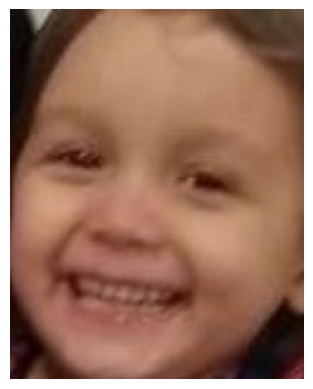

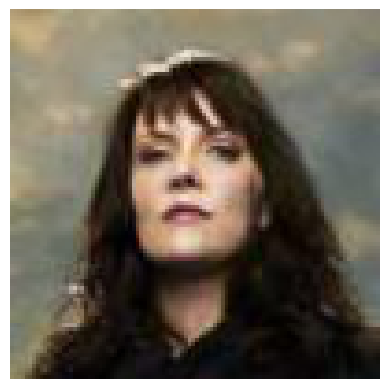

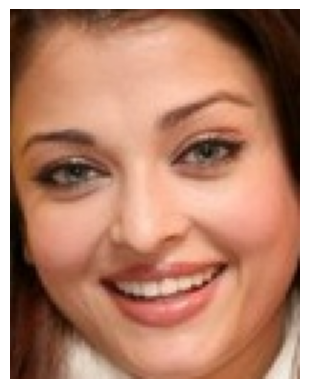

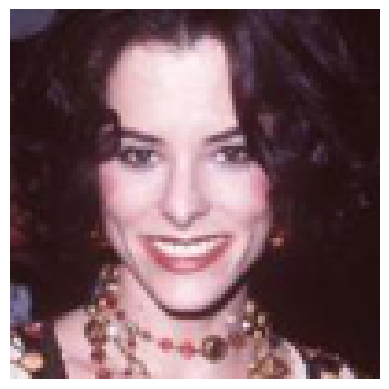

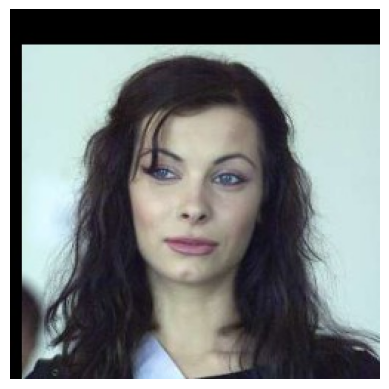

In [7]:
woman_folder_path = '/kaggle/input/biggest-genderface-recognition-dataset/faces/woman'
woman_paths_ = get_image_paths(woman_folder_path)

# Display each image
for path_ in woman_paths_[13:18]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

### model building

In [8]:
model = Sequential([
    Conv2D(256,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [9]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
net = model.fit(train_data,epochs=10,validation_data = validation_data)

Epoch 1/10
  1/637 ━━━━━━━━━━━━━━━━━━━━ 6:04:42 34s/step - accuracy: 0.5625 - loss: 0.6908

I0000 00:00:1721714291.157455     302 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


637/637 ━━━━━━━━━━━━━━━━━━━━ 194s 250ms/step - accuracy: 0.7161 - loss: 0.5497 - val_accuracy: 0.7888 - val_loss: 0.4437
Epoch 2/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 110s 171ms/step - accuracy: 0.8491 - loss: 0.3419 - val_accuracy: 0.8776 - val_loss: 0.3038
Epoch 3/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 108s 169ms/step - accuracy: 0.9005 - loss: 0.2447 - val_accuracy: 0.8990 - val_loss: 0.2520
Epoch 4/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.9196 - loss: 0.2046 - val_accuracy: 0.8820 - val_loss: 0.3294
Epoch 5/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.9309 - loss: 0.1726 - val_accuracy: 0.9015 - val_loss: 0.3662
Epoch 6/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.9449 - loss: 0.1443 - val_accuracy: 0.9041 - val_loss: 0.3205
Epoch 7/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 110s 171ms/step - accuracy: 0.9530 - loss: 0.1279 - val_accuracy: 0.9119 - val_loss: 0.3018
Epoch 8/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step - accuracy: 0.9584 - loss: 0.11

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,442,821 (20.76 MB)

 Trainable params: 1,814,273 (6.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,628,548 (13.84 MB)

In [12]:
model.save('gender_recog_model.keras')